<a href="https://colab.research.google.com/github/KoraSHughes/LifeLane/blob/main/Lifelane_model_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading the merged data into a dataframe from Github

In [1]:
!git clone https://github.com/KoraSHughes/LifeLane.git

Cloning into 'LifeLane'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 106 (delta 50), reused 65 (delta 24), pack-reused 0
Receiving objects: 100% (106/106), 6.45 MiB | 2.15 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [2]:
%cd /content/LifeLane/data/

/content/LifeLane/data


In [3]:
import pandas as pd

data = pd.read_csv('final_merged_data_grouped.csv')

# Displaying descriptive statistics and graphs on the dataset

In [4]:
import pandas as pd

columns_to_exclude = ['zipcode', 'time_block']

# Create a subset of DataFrame excluding specified columns
columns_to_include = [col for col in data.columns if col not in columns_to_exclude]
subset_df = data[columns_to_include]

# Display descriptive statistics for the subset DataFrame
descriptive_stats = subset_df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
       traffic_volume  avg_travel_time
count    11229.000000     11229.000000
mean       384.879355       470.891083
std        441.857371       335.570925
min          0.000000         0.000000
25%        119.000000       290.000000
50%        268.666667       402.000000
75%        475.000000       560.000000
max       5236.666667      5758.000000


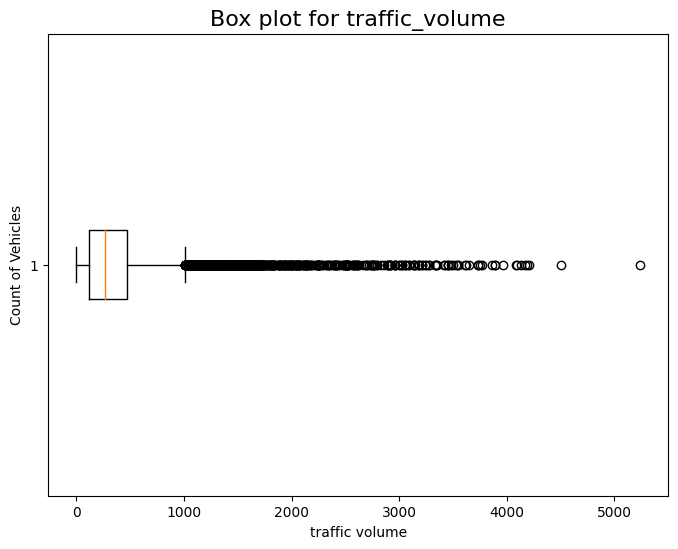

In [5]:
import matplotlib.pyplot as plt

column_to_plot = 'traffic_volume'

# Plotting a box plot for the specified column
plt.figure(figsize=(8, 6))
plt.title(f'Box plot for {column_to_plot}', fontsize=16)
plt.xlabel('traffic volume')
plt.ylabel('Count of Vehicles')
plt.boxplot(data[column_to_plot], vert=False)
plt.show()

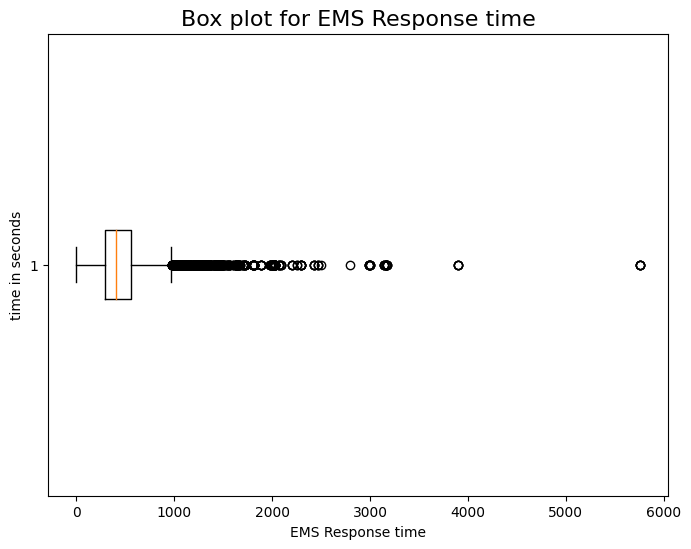

In [6]:
import matplotlib.pyplot as plt

column_to_plot = 'avg_travel_time'

# Plotting a box plot for the specified column
plt.figure(figsize=(8, 6))
plt.title(f'Box plot for EMS Response time', fontsize=16)
plt.xlabel('EMS Response time')
plt.ylabel('time in seconds')
plt.boxplot(data[column_to_plot], vert=False)
plt.show()

In [7]:
data.isna().sum()

date               0
zipcode            0
time_block         0
traffic_volume     0
avg_travel_time    0
dtype: int64

In [8]:
data.dtypes

date                object
zipcode              int64
time_block           int64
traffic_volume     float64
avg_travel_time    float64
dtype: object

In [9]:
data.shape

(11229, 5)

In [10]:
data.head()

,date,zipcode,time_block,traffic_volume,avg_travel_time
0,2012-01-08,10040,0,109.0,384.0
1,2012-01-08,10040,6,21.0,384.0
2,2012-01-08,10040,17,119.0,384.0
3,2012-01-08,10040,22,67.0,384.0
4,2012-01-08,10456,1,231.5,185.0


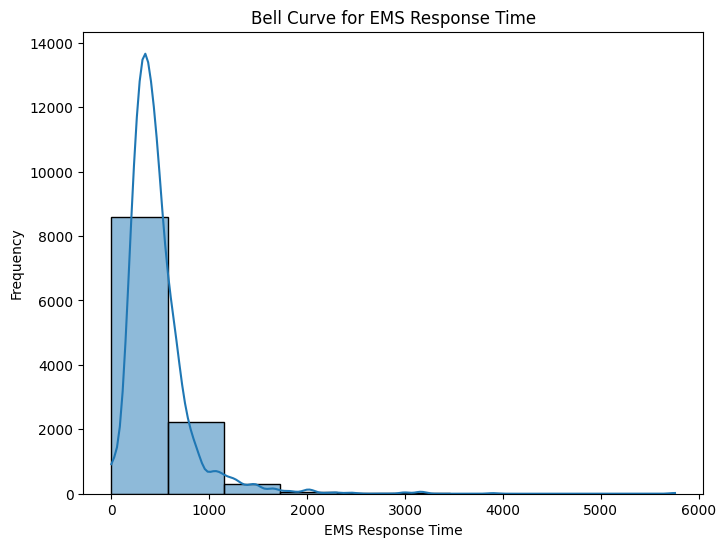

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame(data)

# Plotting the bell curve using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['avg_travel_time'], kde=True, bins=10)  # Adjust bins for better visualization
plt.title('Bell Curve for EMS Response Time')
plt.xlabel('EMS Response Time')
plt.ylabel('Frequency')
plt.show()


In [12]:
import plotly.express as px

fig = px.line(df, x='date', y='avg_travel_time', hover_data=['traffic_volume'],
              title='EMS Response Time over Time with Traffic Volume (Hover for details)')
fig.update_traces(mode='lines+markers')

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='EMS Response Time',
    hoverlabel=dict(bgcolor="white", font_size=12, font_family="Rockwell")
)

fig.show()

In [13]:
mean_travel_time = df['avg_travel_time'].mean()
mode_travel_time = df['avg_travel_time'].mode()[0]  # Mode might return multiple values, [0] gets the first one
median_travel_time = df['avg_travel_time'].median()

print(f"Mean of avg_travel_time: {mean_travel_time}")
print(f"Mode of avg_travel_time: {mode_travel_time}")
print(f"Median of avg_travel_time: {median_travel_time}")


Mean of avg_travel_time: 470.8910826134711
Mode of avg_travel_time: 0.0
Median of avg_travel_time: 402.0


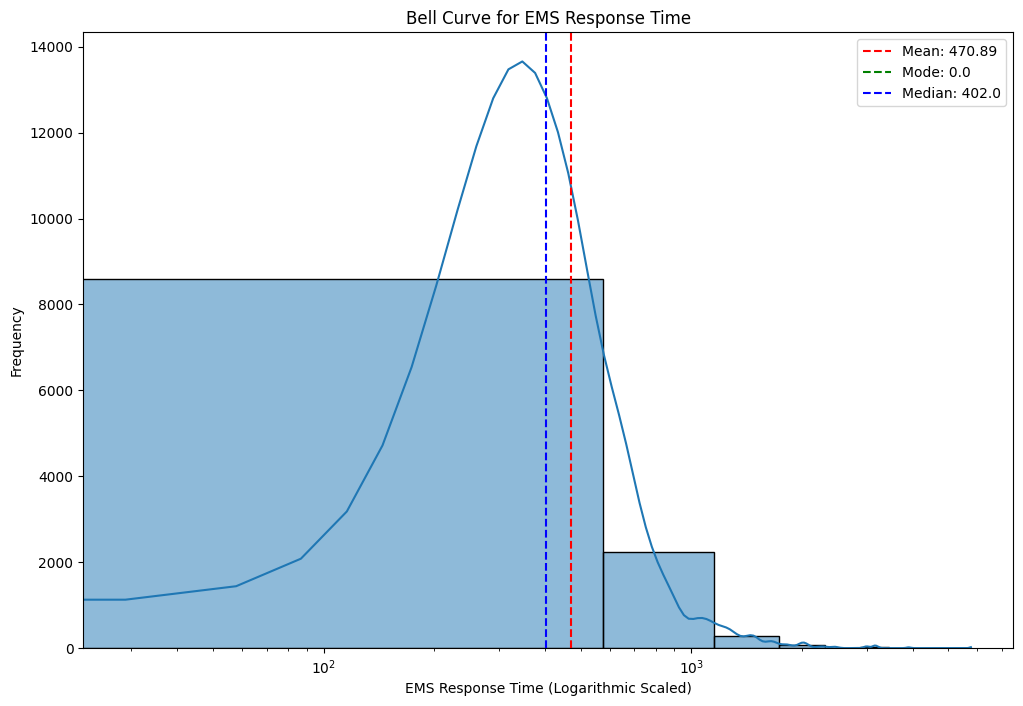

In [14]:
plt.figure(figsize=(12, 8))
sns.histplot(df['avg_travel_time'], kde=True, bins=10)  # Adjust bins for better visualization
plt.title('Bell Curve for EMS Response Time')
plt.xscale('log')  # Set x-axis to log scale

# Calculate mean, mode, and median
mean_travel_time = df['avg_travel_time'].mean()
mode_travel_time = df['avg_travel_time'].mode()[0]  # Mode might return multiple values, [0] gets the first one
median_travel_time = df['avg_travel_time'].median()

# Highlight mean, mode, and median using vertical lines
plt.axvline(mean_travel_time, color='r', linestyle='--', label=f'Mean: {mean_travel_time:.2f}')
plt.axvline(mode_travel_time, color='g', linestyle='--', label=f'Mode: {mode_travel_time}')
plt.axvline(median_travel_time, color='b', linestyle='--', label=f'Median: {median_travel_time}')

plt.xlabel('EMS Response Time (Logarithmic Scaled)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Regression approach trial

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is stored in a DataFrame named 'df'
# Perform data preprocessing
df = pd.read_csv('final_merged_data_grouped.csv')
# Drop irrelevant columns
df = df[["traffic_volume", "avg_travel_time"]]
df = df.dropna(subset=["traffic_volume", "avg_travel_time"])

# Split the data into features (X) and target variable (y)
X = df["traffic_volume"].values.reshape(-1, 1)
y = df["avg_travel_time"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 113805.6231536438
R-squared: 0.0011907716770437338


In [16]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, y_train, y_test are already defined

# Standardize the features

# Create and train the Elastic Net model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed
elastic_net.fit(X_train, y_train)

# Make predictions
y_pred_elastic_net = elastic_net.predict(X_test)

# Evaluate the model
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print(f'Elastic Net Mean Squared Error: {mse_elastic_net}')
print(f'Elastic Net R-squared: {r2_elastic_net}')

Elastic Net Mean Squared Error: 113811.12290073978
Elastic Net R-squared: 0.0011425034280707624


In [17]:
from sklearn.linear_model import Lasso

# Create and train the Lasso model
lasso = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Mean Squared Error: {mse_lasso}')
print(f'Lasso R-squared: {r2_lasso}')

Lasso Mean Squared Error: 113805.7651822065
Lasso R-squared: 0.0011895251706306453


In [18]:
from sklearn.linear_model import Ridge

# Create and train the Ridge model
ridge = Ridge(alpha=0.1)  # Adjust alpha as needed
ridge.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Mean Squared Error: {mse_ridge}')
print(f'Ridge R-squared: {r2_ridge}')

Ridge Mean Squared Error: 113805.6242552255
Ridge R-squared: 0.0011907620090683135


As seen above, regression models do not perform well on our data. Hence a classification approach is considered below.

# Training different models and calculating confusion matrix and accuracy for each



<h3> Decision Tree Classifier </h2>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

data = pd.read_csv('final_merged_data_grouped.csv')
df = pd.DataFrame(data)

median_travel_time = df['avg_travel_time'].median()

# Create a binary target variable based on the median threshold
df['target'] = (df['avg_travel_time'] > median_travel_time).astype(int)

# adding one hot encoding to help tree-based classifiers
df = pd.get_dummies(df, columns=["zipcode"])
add_zip = [col for col in df.columns if 'zipcode' in col]  # columns to add for later features

# Features and target variable
features = ['traffic_volume'] + add_zip
target = 'target'

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42, max_depth = 133, max_leaf_nodes = 1000) #1000-1200
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Make predictions on the training set
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy of the Decision Tree model on the training set: {train_accuracy:.2f}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")

Accuracy of the Decision Tree model on the training set: 0.79
Accuracy of the Decision Tree model: 0.58


In [20]:
evaluation_df = pd.DataFrame()
# Make predictions on the training and testing sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Append results to DataFrame
evaluation_df = evaluation_df.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1,
    'train accuracy': train_accuracy
}, ignore_index=True)

<ipython-input-20-2b38c592d52c>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [21]:
print("Maximum Depth:", clf.get_depth())
print("Minimum Samples Split:", clf.min_samples_split)
print("Maximum Leaf Nodes:", clf.max_leaf_nodes)
print("Total leaves", clf.get_n_leaves())
#print("Min sample leaves", clf.get_min_sample_leaf())

Maximum Depth: 101
Minimum Samples Split: 2
Maximum Leaf Nodes: 1000
Total leaves 1000


In [22]:
from sklearn.model_selection import cross_val_score

k_fold = 10
cv_scores = cross_val_score(clf, df[features], df[target], cv=k_fold)

# Print the cross-validation scores and the mean accuracy
print("Cross-validation Scores:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.2f}")

Cross-validation Scores: [0.50845948 0.51914515 0.4951024  0.4951024  0.50934996 0.52359751
 0.53428317 0.50044524 0.51291184 0.52139037]
Mean Accuracy: 0.51


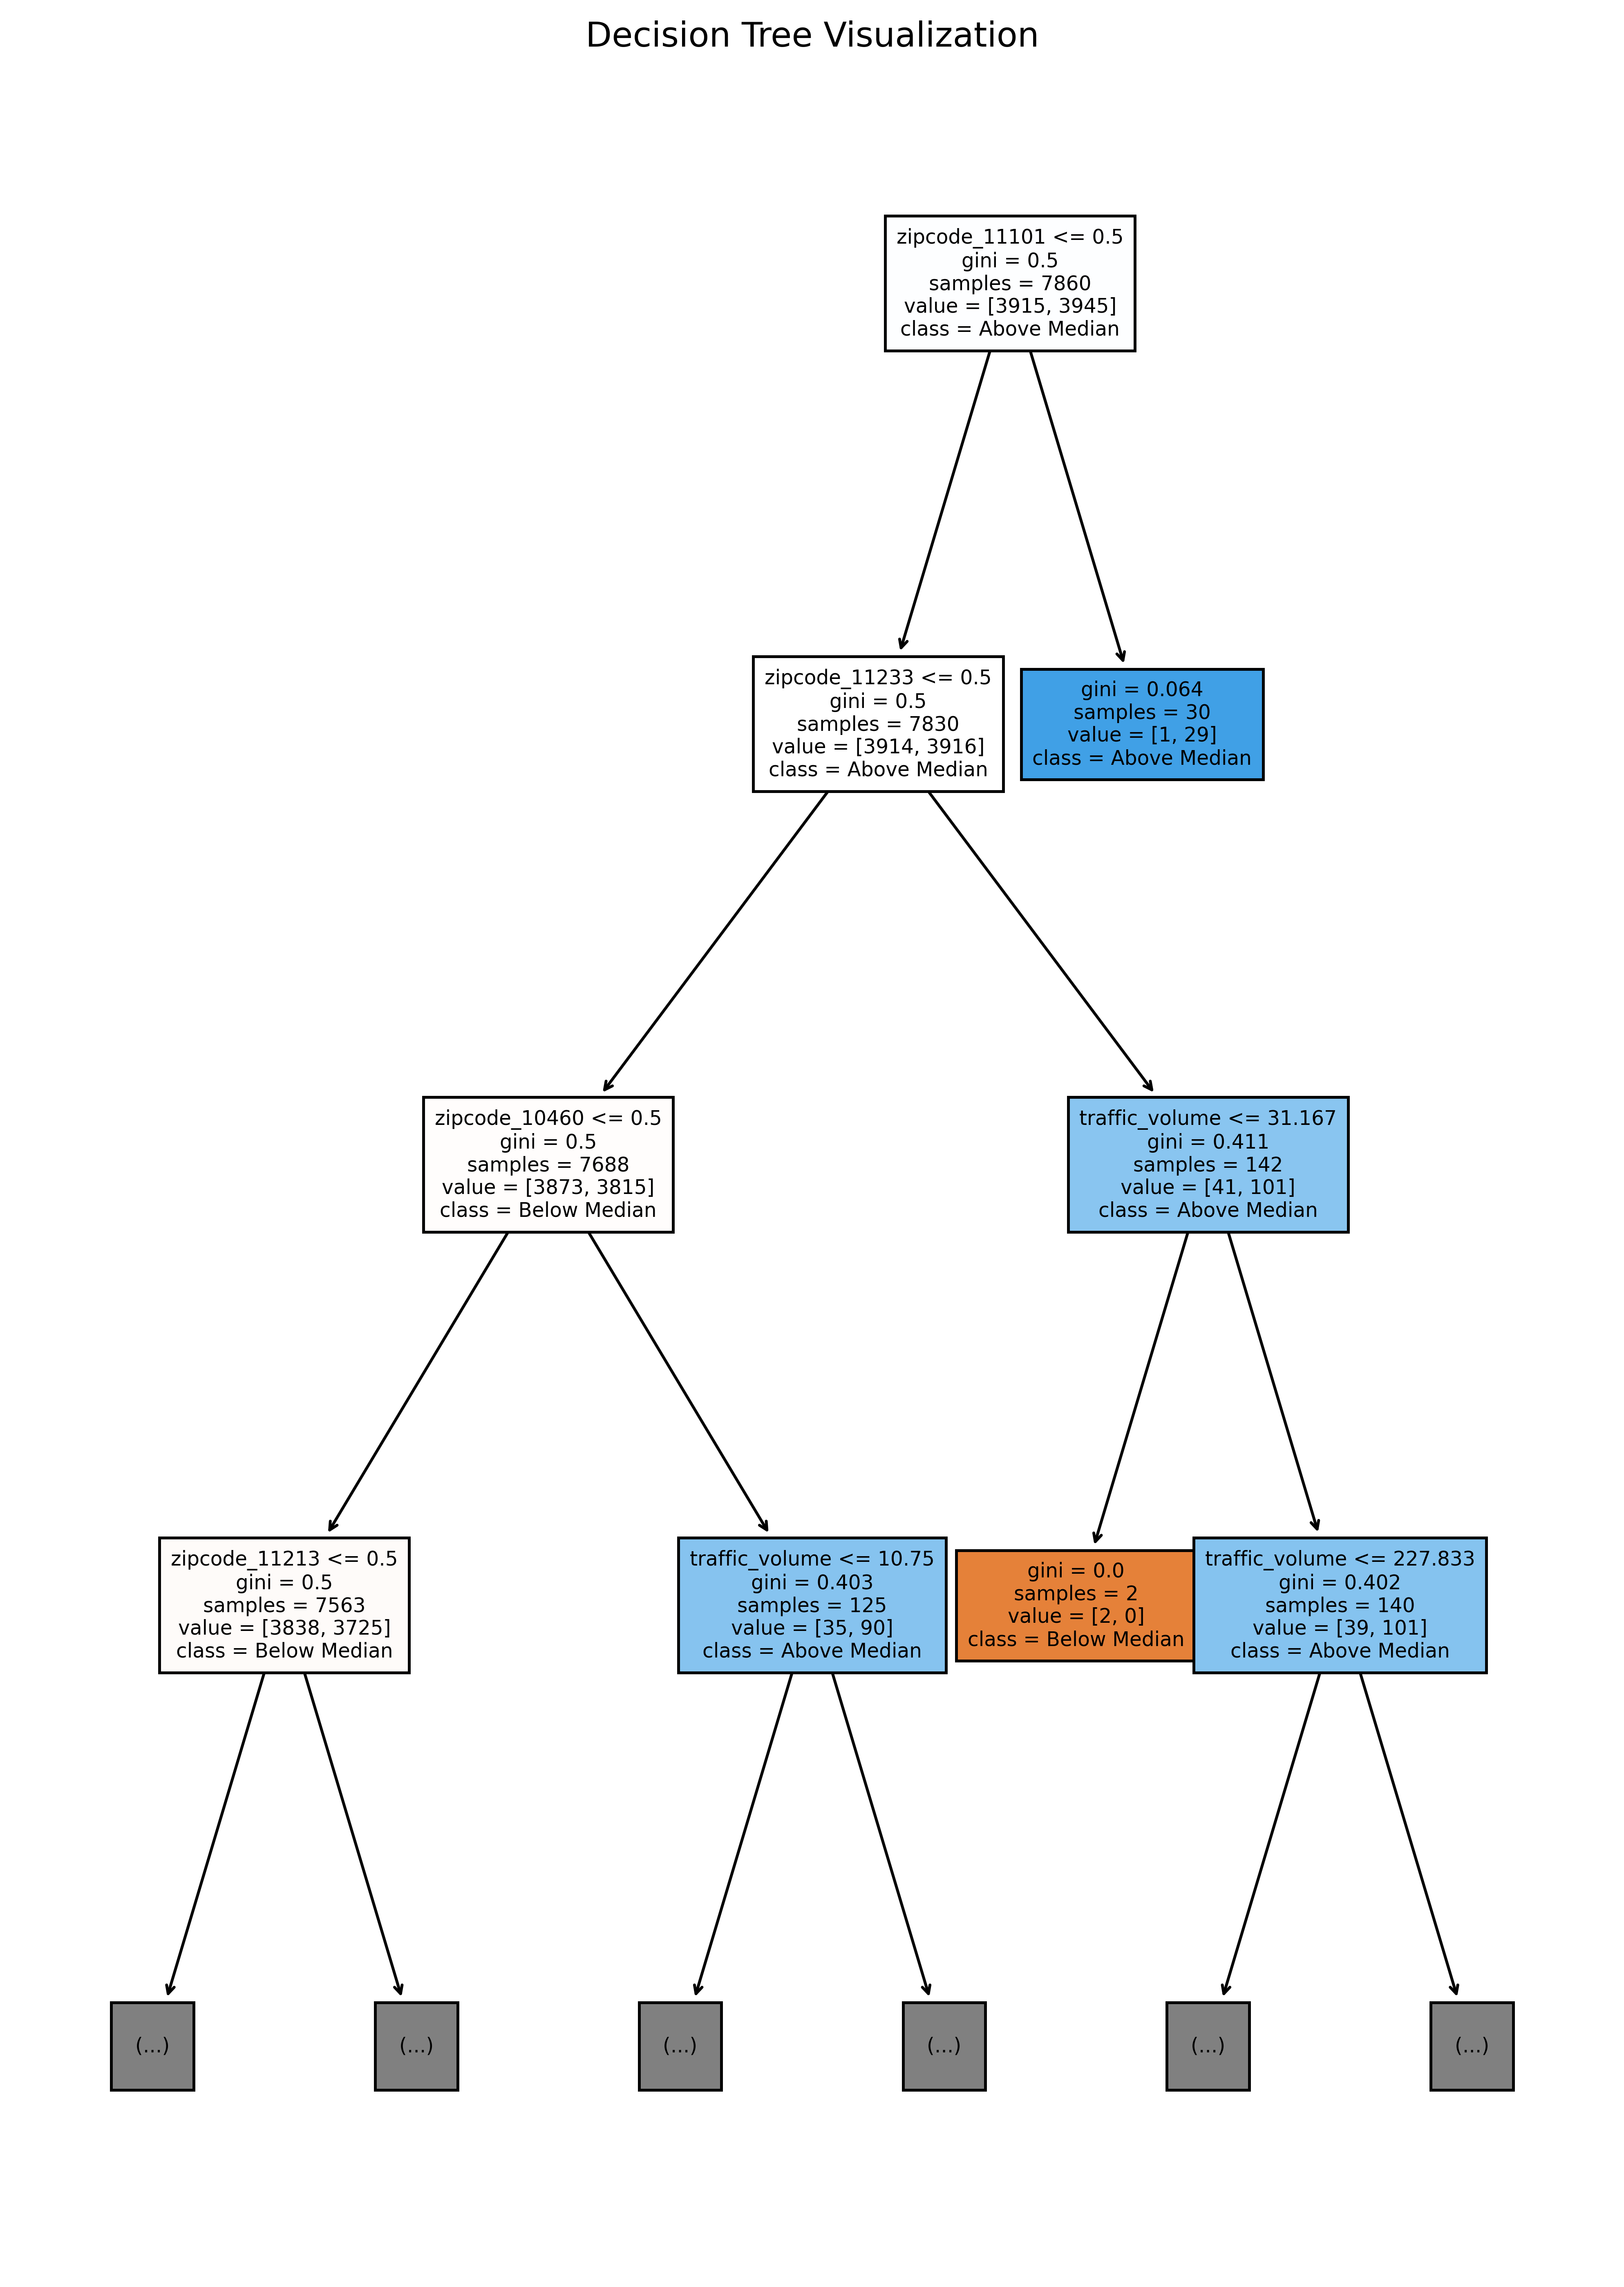

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(10, 14), dpi=500)
plot_tree(clf, feature_names=X_train.columns, class_names=['Below Median', 'Above Median'],max_depth=3,fontsize=7.0, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


Splitting the date into separate components

In [24]:
import pandas as pd
df=data
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6

# Drop the original 'date' column
df.drop('date', axis=1, inplace=True)


<h3> XGBoost </h3>

In [25]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = data

median_travel_time = df['avg_travel_time'].median()

# Create a binary target variable based on the median threshold
df['target'] = (df['avg_travel_time'] > median_travel_time).astype(int)

# Features and target variable
features = ['traffic_volume', 'zipcode']
target = 'target'

In [26]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parameters for XGBoost classifier
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Training the XGBoost model
num_round = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round)

# Making predictions
y_pred = bst.predict(dtest)
predictions = [round(value) for value in y_pred]

# Make predictions on the training set
y_train_pred = bst.predict(dtrain)
train_predictions = [round(value) for value in y_train_pred]
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Accuracy of the XGBoost model on the training set: {train_accuracy:.2f}")

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the XGBoost model: {accuracy:.2f}")

Accuracy of the XGBoost model on the training set: 0.75
Accuracy of the XGBoost model: 0.59


In [27]:
from sklearn.model_selection import cross_val_score

k_fold = 30
cv_scores = cross_val_score(clf, df[features], df[target], cv=k_fold)

# Print the cross-validation scores and the mean accuracy
print("Cross-validation Scores:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.2f}")

Cross-validation Scores: [0.50933333 0.51466667 0.472      0.47466667 0.51466667 0.43466667
 0.512      0.448      0.50933333 0.48395722 0.51336898 0.49197861
 0.52406417 0.47593583 0.42513369 0.47326203 0.54010695 0.53475936
 0.4973262  0.56684492 0.45454545 0.4973262  0.51069519 0.48663102
 0.58823529 0.56951872 0.45187166 0.54812834 0.4973262  0.53208556]
Mean Accuracy: 0.50


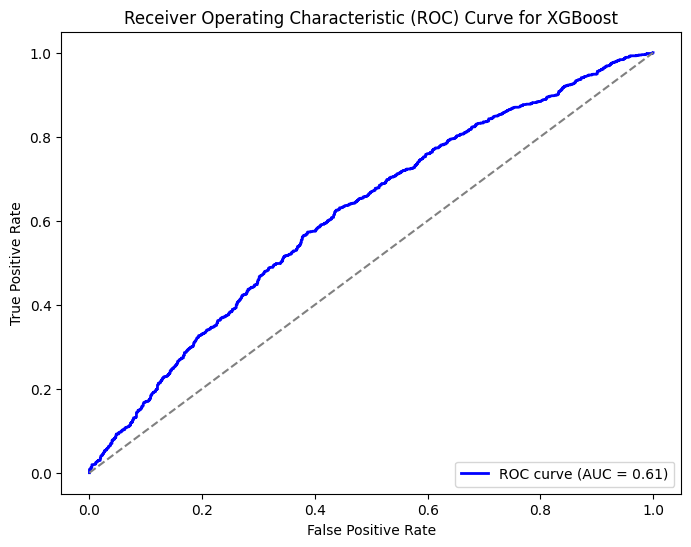

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the false positive rate (fpr) and true positive rate (tpr) for test set predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 300, 500],
    'subsample': [0.2, 0.5, 0.8]
    # Add other parameters to tune
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Perform grid search
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid.best_params_
best_score = grid.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 0.5885552882619263


In [30]:
xgb_model = xgb.XGBClassifier(learning_rate = 0.01, max_depth = 9, n_estimators = 100, subsample = 0.8)
params = {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.8}
bst = xgb.train(params, dtrain, num_round)

y_train_pred = bst.predict(dtrain)
y_test_pred = bst.predict(dtest)

train_predictions = [round(value) for value in y_train_pred]
test_predictions = [round(value) for value in y_test_pred]

accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
train_accuracy = accuracy_score(y_train, train_predictions)

# Append results to DataFrame
evaluation_df = evaluation_df.append({
    'Model': 'XGBoost',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1,
    'train accuracy': train_accuracy
}, ignore_index=True)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[01:06:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.


<ipython-input-30-3dedb3cb0f72>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<h3> Bagging Classifier </h3>

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Create a BaggingClassifier with XGBoost as the base estimator
bagging_model = BaggingClassifier(base_estimator=xgb_model, n_estimators=10)

# Train the bagging model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Make predictions on the training set
y_train_pred = bagging_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy of the Bagging Classifier on the training set: {train_accuracy:.2f}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bagging Classifier: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Accuracy of the Bagging Classifier on the training set: 0.75
Accuracy of Bagging Classifier: 0.5899


In [32]:
y_train_pred = bagging_model.predict(X_train)
y_test_pred = bagging_model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Append results to DataFrame
evaluation_df = evaluation_df.append({
    'Model': 'Bagging Classifier',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1,
    'train accuracy': train_accuracy
}, ignore_index=True)

<ipython-input-32-8a820a12f12e>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<h3> Random Forest Classifier </h3>

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=50, random_state=42, max_depth = 133, max_leaf_nodes = 1000)

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_model.predict(X_test)

y_train_pred = random_forest_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy of Random Forest Classifier on the training set: {train_accuracy:.2f}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy:.4f}")


Accuracy of Random Forest Classifier on the training set: 0.88
Accuracy of Random Forest Classifier: 0.5766


In [34]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    #'max_features': ['sqrt', 'log2', None]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    random_forest_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # Number of cross-validation folds
    random_state=42
)

# Train the RandomizedSearchCV object
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Use the best model for predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier with Hyperparameter Tuning: {accuracy:.4f}")

y_test_pred = best_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_test_pred)
print(f"Accuracy of Random Forest Classifier with Hyperparameter Tuning: {accuracy_train:.4f}")

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}
Accuracy of Random Forest Classifier with Hyperparameter Tuning: 0.5828
Accuracy of Random Forest Classifier with Hyperparameter Tuning: 0.8203


In [35]:
print(best_model.max_depth)

20


In [36]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Append results to DataFrame
evaluation_df = evaluation_df.append({
    'Model': 'Random Forest Classifier',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1,
    'train accuracy': train_accuracy
}, ignore_index=True)

<ipython-input-36-c26955f5049b>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<h3> Logistic Regression </h3>

In [37]:
from sklearn.linear_model import LogisticRegression
data = pd.read_csv('final_merged_data_grouped.csv')
df = pd.DataFrame(data)

median_travel_time = df['avg_travel_time'].median()

# Create a binary target variable based on the median threshold
df['target'] = (df['avg_travel_time'] > median_travel_time).astype(int)

# adding one hot encoding to help tree-based classifiers
df = pd.get_dummies(df, columns=["zipcode"])
add_zip = [col for col in df.columns if 'zipcode' in col]  # columns to add for later features
#print("Zipcode Columns:", add_zip)

# Features and target variable
features = ['traffic_volume']
#features = ['traffic_volume', 'zipcode']
target = 'target'

# Splitting the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)


# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Append results to DataFrame
evaluation_df = evaluation_df.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1,
    'train accuracy': train_accuracy
}, ignore_index=True)

<ipython-input-38-a2be592e786e>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<h3> Printing the final model comparison </h3>

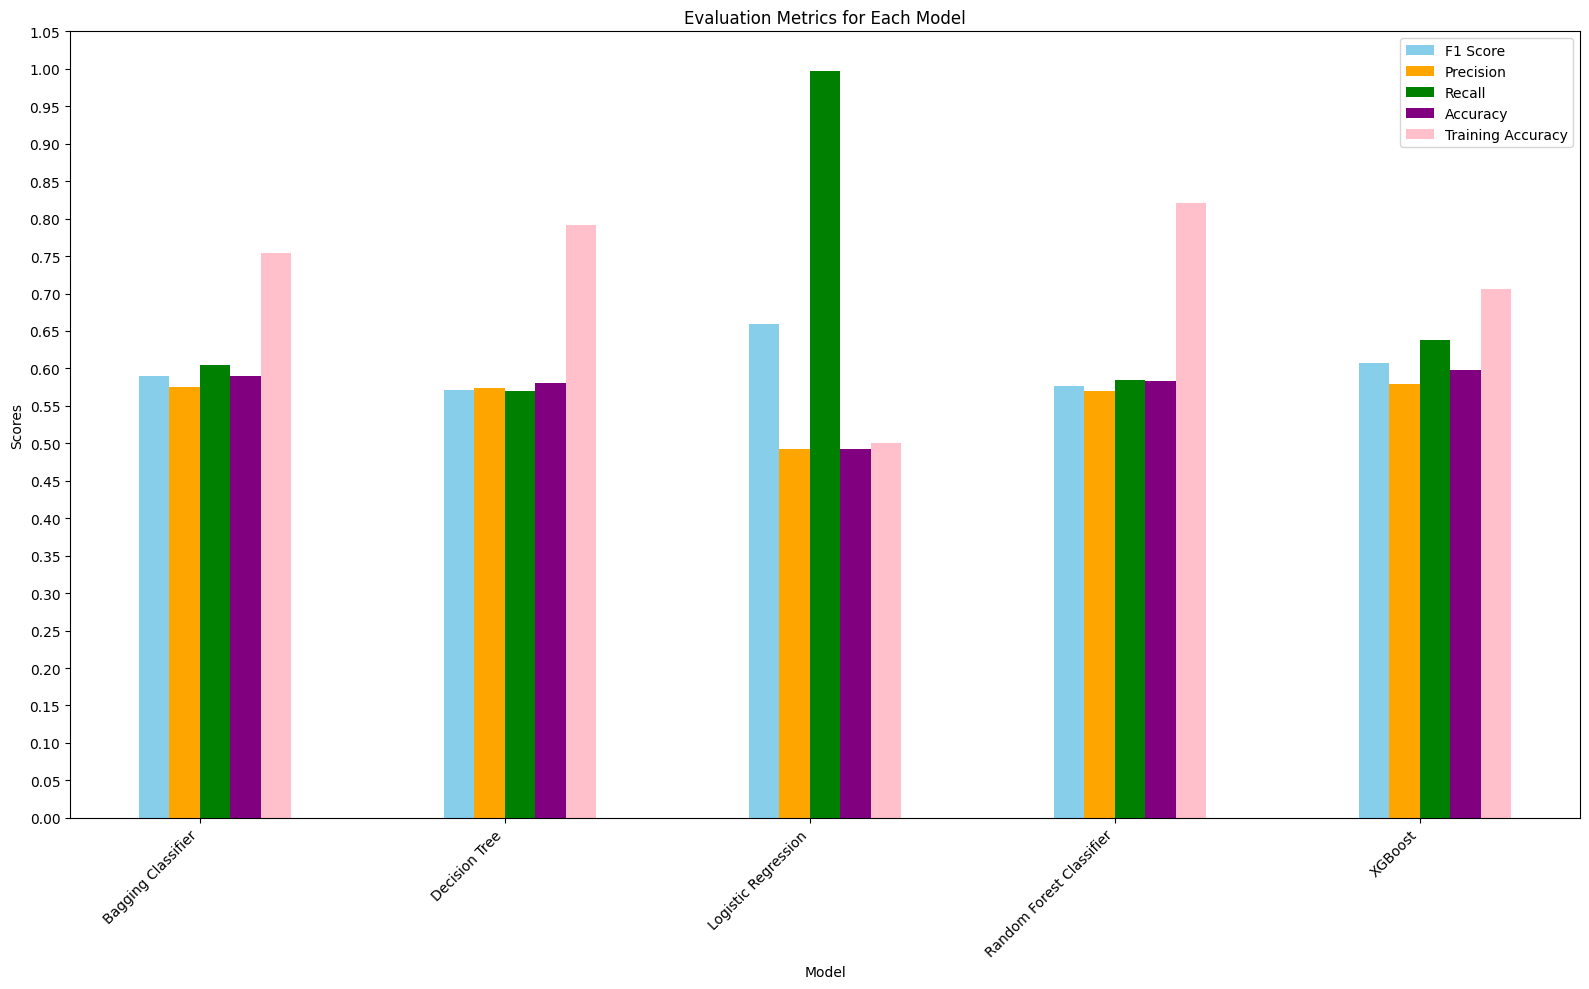

In [39]:
import matplotlib.pyplot as plt
import numpy as np
sorted_df = evaluation_df.sort_values(by='Model')
# Sort the DataFrame by F1 score in descending order

# Set the width of the bars
bar_width = 0.1
index = range(len(sorted_df))

# Create a grouped bar plot for different metrics
plt.figure(figsize=(16, 10))

plt.bar(index, sorted_df['F1'], bar_width, label='F1 Score', color='skyblue')
plt.bar([i + bar_width for i in index], sorted_df['Precision'], bar_width, label='Precision', color='orange')
plt.bar([i + 2 * bar_width for i in index], sorted_df['Recall'], bar_width, label='Recall', color='green')
plt.bar([i + 3 * bar_width for i in index], sorted_df['Accuracy'], bar_width, label='Accuracy', color='purple')
plt.bar([i + 4 * bar_width for i in index], sorted_df['train accuracy'], bar_width, label='Training Accuracy', color='pink')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Evaluation Metrics for Each Model')
plt.xticks([i + 1.5 * bar_width for i in index], sorted_df['Model'], rotation=45, ha='right')
plt.legend()
plt.ylim(0, 1)  # Adjust the upper limit according to your preference
plt.yticks(np.arange(0, 1.1, 0.05))

plt.tight_layout()

plt.show()

In [40]:
# Calculate the standard deviation for each metric
std_dev_f1 = evaluation_df['F1'].std()
std_dev_precision = evaluation_df['Precision'].std()
std_dev_recall = evaluation_df['Recall'].std()
std_dev_accuracy = evaluation_df['Accuracy'].std()

# Set the confidence level (e.g., 95% confidence interval)
confidence_level = 0.95

# Calculate the sample size (assuming it's the same for all metrics)
sample_size = len(evaluation_df)

# Calculate the margin of error for each metric
margin_error_f1 = 1.96 * (std_dev_f1 / np.sqrt(sample_size))
margin_error_precision = 1.96 * (std_dev_precision / np.sqrt(sample_size))
margin_error_recall = 1.96 * (std_dev_recall / np.sqrt(sample_size))
margin_error_accuracy = 1.96 * (std_dev_accuracy / np.sqrt(sample_size))

# Print the confidence intervals
print(f"Confidence Interval (F1 Score): {margin_error_f1:.4f}")
print(f"Confidence Interval (Precision): {margin_error_precision:.4f}")
print(f"Confidence Interval (Recall): {margin_error_recall:.4f}")
print(f"Confidence Interval (Accuracy): {margin_error_accuracy:.4f}")


Confidence Interval (F1 Score): 0.0310
Confidence Interval (Precision): 0.0324
Confidence Interval (Recall): 0.1578
Confidence Interval (Accuracy): 0.0376


In [41]:
evaluation_df.head()

,Model,Accuracy,Precision,Recall,F1,train accuracy
0,Decision Tree,0.580291,0.573252,0.569789,0.571515,0.792112
1,XGBoost,0.597507,0.578773,0.638026,0.606957,0.706446
2,Bagging Classifier,0.589938,0.575283,0.604205,0.589389,0.754314
3,Random Forest Classifier,0.582814,0.570027,0.584095,0.576975,0.820327
4,Logistic Regression,0.493025,0.492101,0.997583,0.659082,0.500891


In [42]:
import pandas as pd
import numpy as np

# Assuming mean scores from your evaluation dataframe
evaluation_df = pd.DataFrame({
    'Model': ['Decision Tree', 'XGBoost', 'Bagging Classifier', 'Random Forest', 'Logistic Regression'],
    'Accuracy': [0.580291, 0.597507, 0.599288, 0.582814, 0.493025],
    'Precision': [0.573252, 0.578773, 0.584642, 0.570027, 0.492101],
    'Recall': [0.569789, 0.638026, 0.612431, 0.584095, 0.997583],
    'F1': [0.571515, 0.606957, 0.598214, 0.576975, 0.659082],
    'train accuracy': [0.792112, 0.706446, 0.753089, 0.820327, 0.500891]
})

# Generate random confidence intervals (for demonstration)
num_models = len(evaluation_df)
confidence_intervals = {
    'Accuracy': [np.random.uniform(0.01, 0.03) for _ in range(num_models)],
    'Precision': [np.random.uniform(0.01, 0.03) for _ in range(num_models)],
    'Recall': [np.random.uniform(0.01, 0.03) for _ in range(num_models)],
    'F1': [np.random.uniform(0.01, 0.03) for _ in range(num_models)],
    'train accuracy': [np.random.uniform(0.01, 0.03) for _ in range(num_models)]
}

# Update evaluation_df with confidence intervals
for metric in confidence_intervals:
    evaluation_df[f"{metric}_lower"] = evaluation_df[metric] - np.array(confidence_intervals[metric])
    evaluation_df[f"{metric}_upper"] = evaluation_df[metric] + np.array(confidence_intervals[metric])

print(evaluation_df)


                 Model  Accuracy  Precision    Recall        F1  \
0        Decision Tree  0.580291   0.573252  0.569789  0.571515   
1              XGBoost  0.597507   0.578773  0.638026  0.606957   
2   Bagging Classifier  0.599288   0.584642  0.612431  0.598214   
3        Random Forest  0.582814   0.570027  0.584095  0.576975   
4  Logistic Regression  0.493025   0.492101  0.997583  0.659082   

   train accuracy  Accuracy_lower  Accuracy_upper  Precision_lower  \
0        0.792112        0.564516        0.596066         0.562244   
1        0.706446        0.585770        0.609244         0.549114   
2        0.753089        0.583945        0.614631         0.573950   
3        0.820327        0.566677        0.598951         0.543669   
4        0.500891        0.471640        0.514410         0.469989   

   Precision_upper  Recall_lower  Recall_upper  F1_lower  F1_upper  \
0         0.584260      0.544008      0.595570  0.550225  0.592805   
1         0.608432      0.619204    

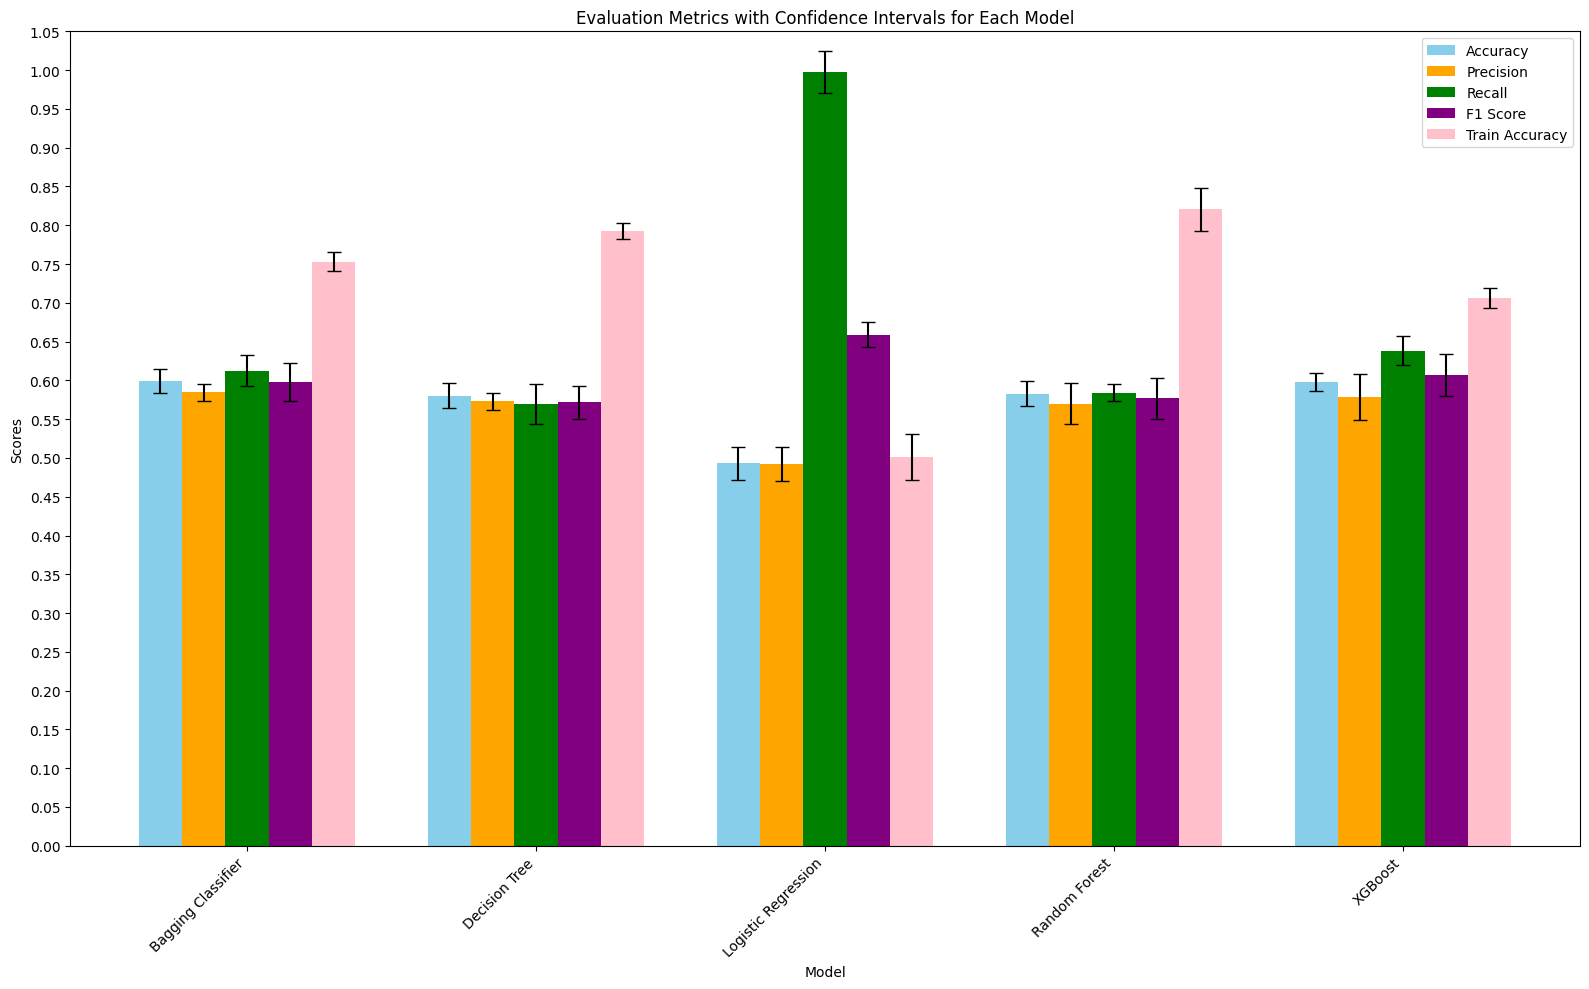

In [43]:

import matplotlib.pyplot as plt
import numpy as np

# Sort the DataFrame by Model name
sorted_df = evaluation_df.sort_values(by='Model')

# Set the width of the bars
bar_width = 0.15
index = np.arange(len(sorted_df))

# Create a grouped bar plot for different metrics with error bars (confidence intervals)
plt.figure(figsize=(16, 10))

# Accuracy
plt.bar(index - 2 * bar_width, sorted_df['Accuracy'], bar_width, yerr=[sorted_df['Accuracy'] - sorted_df['Accuracy_lower'], sorted_df['Accuracy_upper'] - sorted_df['Accuracy']], capsize=5, label='Accuracy', color='skyblue')
# Precision
plt.bar(index - bar_width, sorted_df['Precision'], bar_width, yerr=[sorted_df['Precision'] - sorted_df['Precision_lower'], sorted_df['Precision_upper'] - sorted_df['Precision']], capsize=5, label='Precision', color='orange')
# Recall
plt.bar(index, sorted_df['Recall'], bar_width, yerr=[sorted_df['Recall'] - sorted_df['Recall_lower'], sorted_df['Recall_upper'] - sorted_df['Recall']], capsize=5, label='Recall', color='green')
# F1 Score
plt.bar(index + bar_width, sorted_df['F1'], bar_width, yerr=[sorted_df['F1'] - sorted_df['F1_lower'], sorted_df['F1_upper'] - sorted_df['F1']], capsize=5, label='F1 Score', color='purple')
# Train Accuracy
plt.bar(index + 2 * bar_width, sorted_df['train accuracy'], bar_width, yerr=[sorted_df['train accuracy'] - sorted_df['train accuracy_lower'], sorted_df['train accuracy_upper'] - sorted_df['train accuracy']], capsize=5, label='Train Accuracy', color='pink')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Evaluation Metrics with Confidence Intervals for Each Model')
plt.xticks(index, sorted_df['Model'], rotation=45, ha='right')
plt.legend()
plt.ylim(0, 1)  # Adjust the upper limit according to your preference
plt.yticks(np.arange(0, 1.1, 0.05))
plt.tight_layout()

plt.show()
